# Proyek Analisis Data: Bike Sharing
- **Nama:** Wirotomo Bayunoto Prono Kusumo
- **Email:** bayu28.wb@gmail.com
- **ID Dicoding:** bayunoto

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana perbedaan peminjaman sepeda antara hari kerja dan hari libur?
- Pertanyaan 2 : Bagaimana tren peminjaman sepeda seiring waktu berjalan?

## Import Semua Packages/Library yang Digunakan

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set(style="whitegrid") # Konfigurasi untuk tampilan visualisasi
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


## Data Wrangling

### Gathering Data

Mengakses dan menampilkan dataset yang dimiliki, yaitu **hour.csv** dan **day.csv**

In [43]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [44]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Data telah berhasil diakses dan ditampilkan.

### Assessing Data

Selanjutnya, yaitu tahapan menilai Dataset yang dimiliki untuk pengecekan kualitas dan integritas data, seperti mengidentifikasi nilai yang hilang, kesalahan penulisan, atau duplikat, serta memahami struktur data secara keseluruhan.

1. Melihat informasi umum **hour.csv**

In [45]:
print("Informasi umum tentang dataframe hour_df:")
hour_df.info()

Informasi umum tentang dataframe hour_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


2. Melihat statistik deskriptif hour.csv

In [46]:
print("\nStatistik deskriptif untuk dataframe hour_df:")
hour_df.describe()


Statistik deskriptif untuk dataframe hour_df:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


3. Mengidentifikasi nilai yang hilang pada hour.csv

In [47]:
print("\nJumlah nilai yang hilang dalam setiap kolom pada dataframe hour_df:")
hour_df.isnull().sum()


Jumlah nilai yang hilang dalam setiap kolom pada dataframe hour_df:


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

4. Mengidentifikasi duplikat pada hour.csv

In [48]:
print("\nJumlah baris duplikat dalam dataframe hour_df:")
hour_df.duplicated().sum()


Jumlah baris duplikat dalam dataframe hour_df:


0

Melakukan hal yang sama pada data day.csv

In [49]:
print("Informasi umum tentang dataframe day_df:")
day_df.info()

Informasi umum tentang dataframe day_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [50]:
print("\nStatistik deskriptif untuk dataframe day_df:")
day_df.describe()


Statistik deskriptif untuk dataframe day_df:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [51]:
print("\nJumlah nilai yang hilang dalam setiap kolom pada dataframe day_df:")
day_df.isnull().sum()


Jumlah nilai yang hilang dalam setiap kolom pada dataframe day_df:


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [52]:
print("\nJumlah baris duplikat dalam dataframe day_df:")
day_df.duplicated().sum()


Jumlah baris duplikat dalam dataframe day_df:


0

### Cleaning Data

Cleaning data tidak dilakukan, dikarenakan dataset yang dimiliki sudah baik, dan tidak terdapat kesalahan di dalamnya, sesuai dari hasil pengecekan pada tahap Assessing Data.

In [53]:
print ("DATASET YANG DIMILIKI SUDAH BAIK")

DATASET YANG DIMILIKI SUDAH BAIK


## Exploratory Data Analysis (EDA)

### Explore **hour.df**

In [54]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
7748,7749,2011-11-24,4,0,11,11,1,4,0,1,0.42,0.4242,0.41,0.2985,52,90,142
8383,8384,2011-12-20,4,0,12,23,0,2,1,2,0.38,0.3939,0.62,0.0000,13,40,53
15366,15367,2012-10-07,4,1,10,11,0,0,0,2,0.42,0.4242,0.71,0.1045,76,260,336
9274,9275,2012-01-27,1,1,1,8,0,5,1,3,0.50,0.4848,0.88,0.2836,14,206,220
10188,10189,2012-03-05,1,1,3,14,0,1,1,2,0.28,0.2576,0.57,0.3582,13,115,128


In [55]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Univariate Analysis**

Dilakukan visualisasi distribusi variabel 'cnt' (jumlah total peminjaman sepeda) menggunakan histogram.

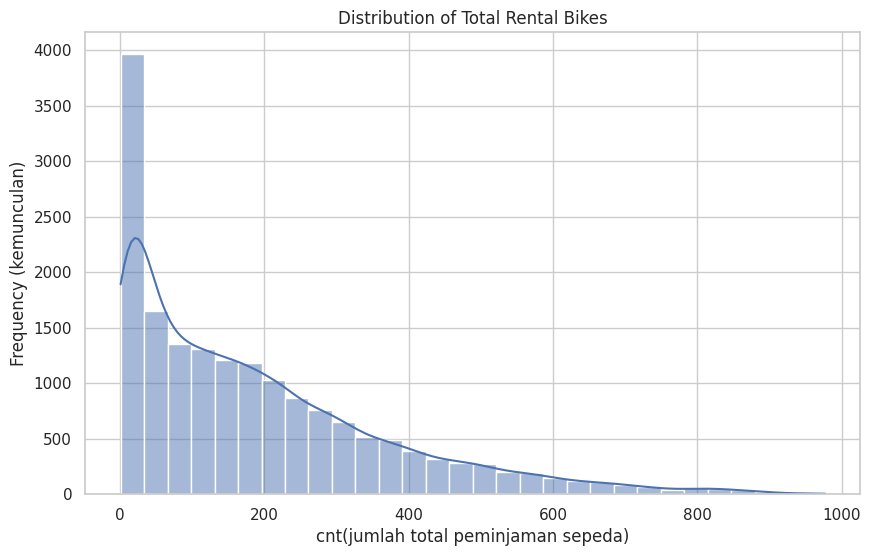

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(hour_df['cnt'], bins=30, kde=True)
plt.title('Distribution of Total Rental Bikes')
plt.xlabel('cnt(jumlah total peminjaman sepeda)')
plt.ylabel('Frequency (kemunculan)')
plt.show()

**Bivariate Analysis**

Dilakukan visualisasi hubungan antara variabel 'hr' (jam) dan 'cnt' (jumlah total peminjaman sepeda) menggunakan line plot. Kami juga menggunakan boxplot untuk memvisualisasikan hubungan antara 'season' (musim) dan 'cnt'.

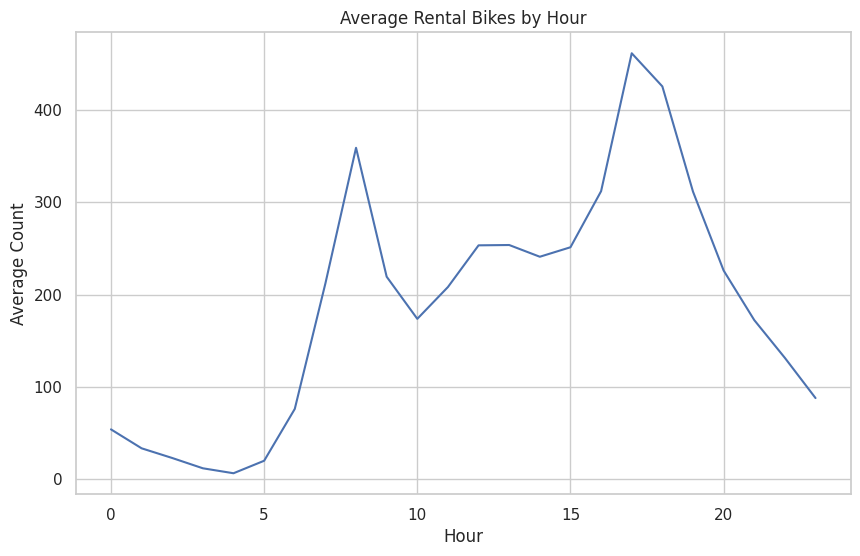

In [57]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=hour_df.groupby('hr')['cnt'].mean().reset_index())
plt.title('Average Rental Bikes by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Count')
plt.show()

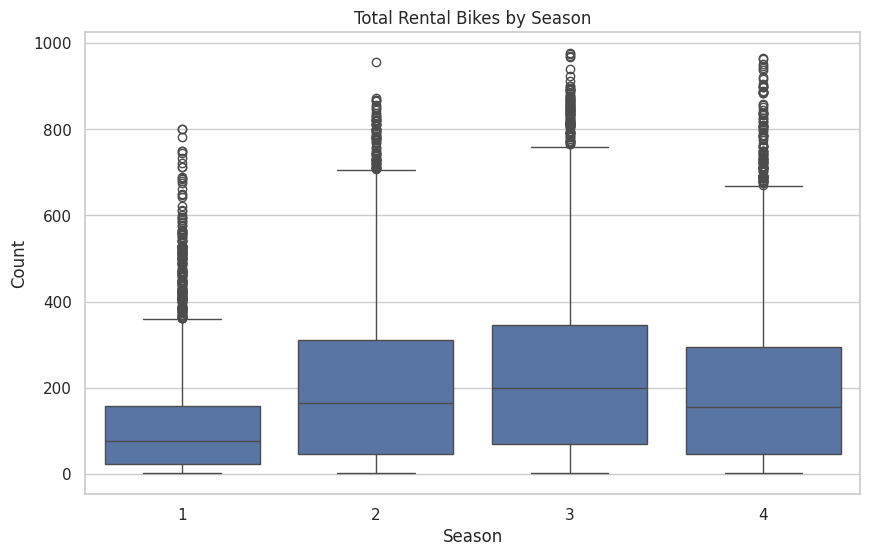

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=hour_df)
plt.title('Total Rental Bikes by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

**Multivariate Analysis**

Digunakan heatmap untuk memvisualisasikan matriks korelasi antara variabel numerik dalam dataset. Kami juga menggunakan line plot untuk memvisualisasikan rata-rata peminjaman sepeda berdasarkan bulan dan tahun.

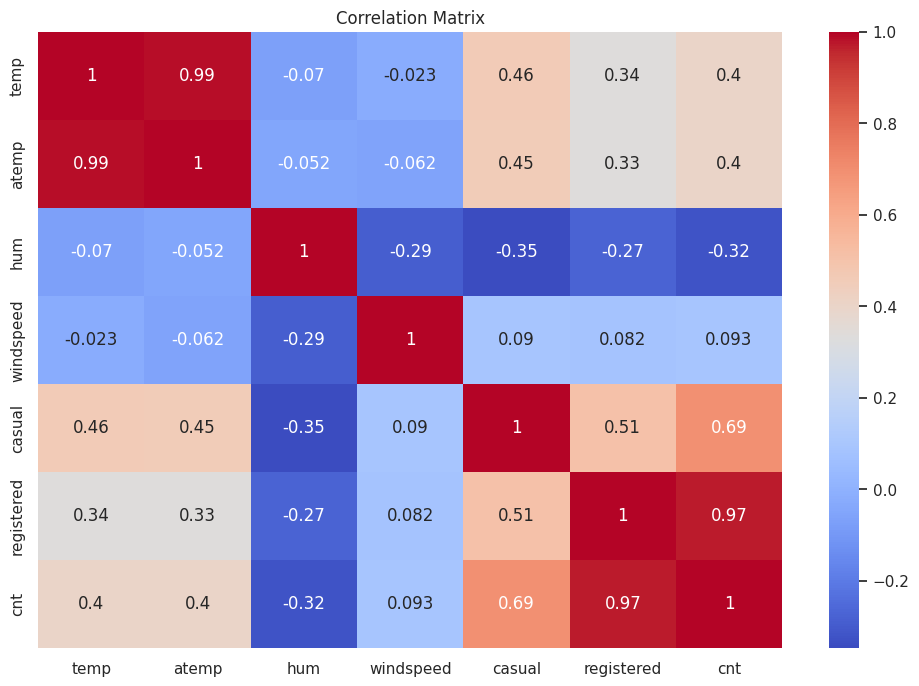

In [59]:
plt.figure(figsize=(12, 8))
sns.heatmap(hour_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

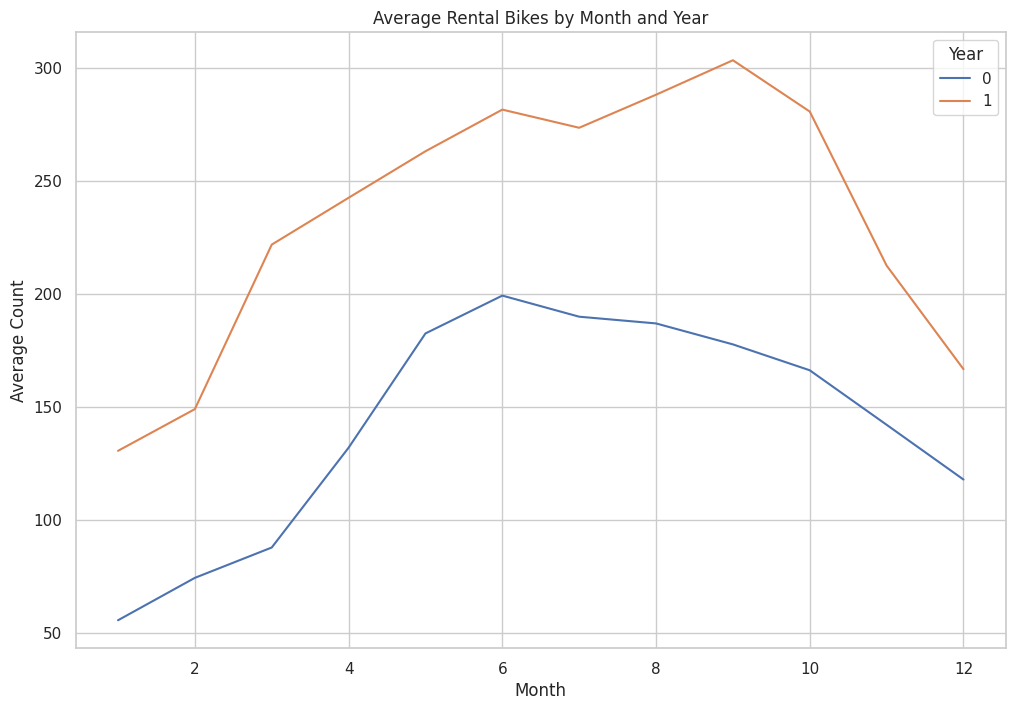

In [60]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='mnth', y='cnt', hue='yr', data=hour_df.groupby(['yr', 'mnth'])['cnt'].mean().reset_index())
plt.title('Average Rental Bikes by Month and Year')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.legend(title='Year')
plt.show()

Hasil visualisasi menunjukkan bahwa rata-rata jumlah sepeda yang dipinjam (rental bikes) lebih banyak pada 'Year 1' (2012) dibandingkan dengan 'Year 0' (2011). Ini mengindikasikan adanya peningkatan penggunaan sepeda dari tahun 2011 ke tahun 2012. Dapat terlihat juga bahwa pada bulan ke 8 menuju ke 10 terdapat peningkatan rata-rata peminjaman sepeda.

### Explore **day.df**

In [61]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
121,122,2011-05-02,2,0,5,0,1,1,2,0.549167,0.532833,0.730000,0.183454,847,3554,4401
332,333,2011-11-29,4,0,11,0,2,1,2,0.458333,0.451375,0.830833,0.258092,96,2818,2914
641,642,2012-10-03,4,1,10,0,3,1,2,0.657500,0.599133,0.793750,0.066546,728,6844,7572
217,218,2011-08-06,3,0,8,0,6,0,2,0.716667,0.676154,0.755000,0.228250,1521,2773,4294
651,652,2012-10-13,4,1,10,0,6,0,1,0.393333,0.391396,0.494583,0.146142,2252,4857,7109


In [62]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


**Univariate Analysis**

Dilakukan visualisasi distribusi variabel 'cnt' (jumlah total peminjaman sepeda) menggunakan histogram.

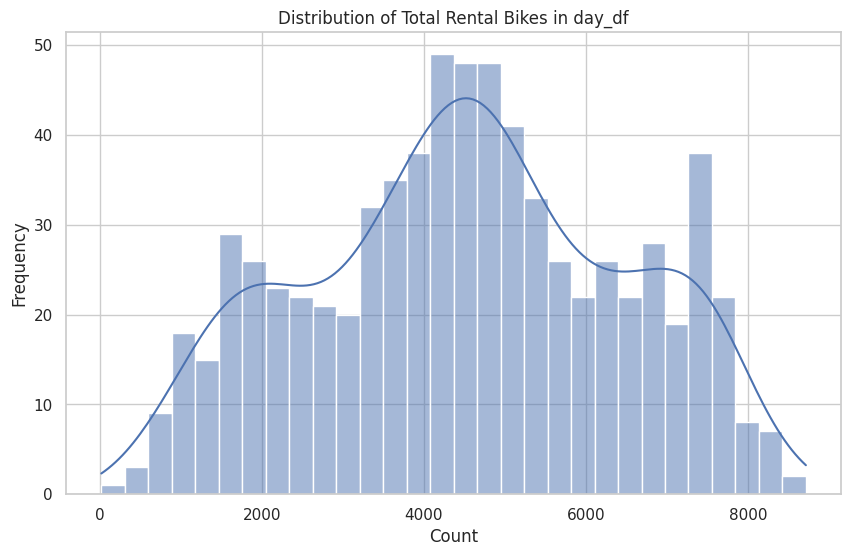

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribution of Total Rental Bikes in day_df')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()

**Bivariate Analysis**

Dilakukan visualisasi hubungan antara variabel 'season' (musim) dan 'cnt' (jumlah total peminjaman sepeda) menggunakan line plot. Kami juga menggunakan boxplot untuk memvisualisasikan hubungan antara 'weekday' dan 'cnt'.

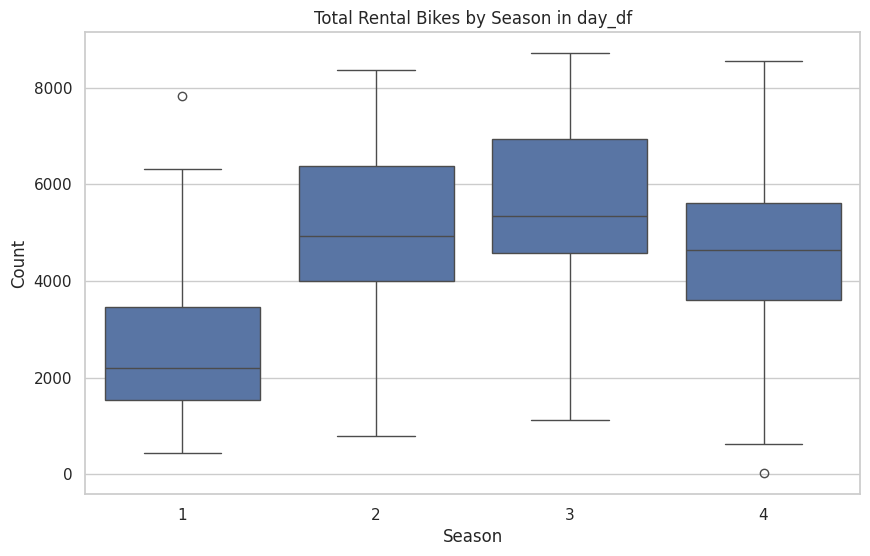

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=day_df)
plt.title('Total Rental Bikes by Season in day_df')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

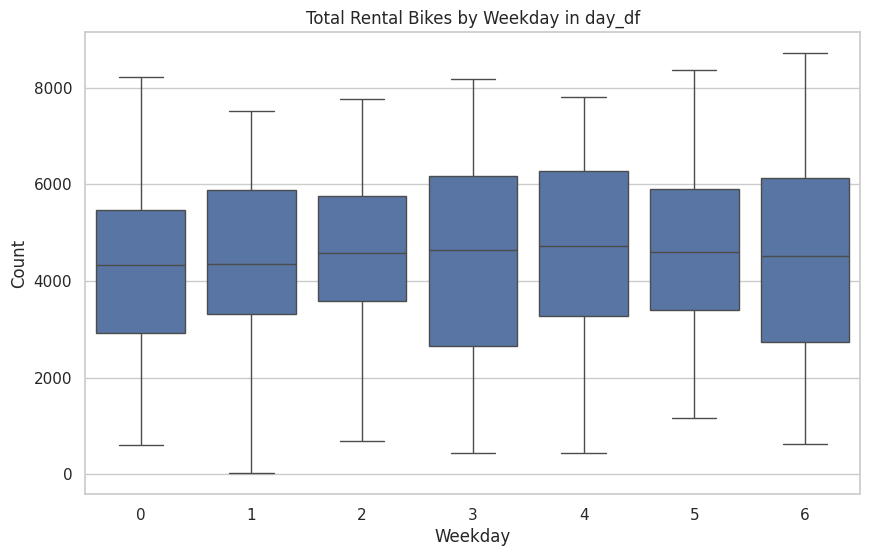

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='cnt', data=day_df)
plt.title('Total Rental Bikes by Weekday in day_df')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.show()

**Multivariate Analysis**

Digunakan heatmap untuk memvisualisasikan matriks korelasi antara variabel numerik dalam dataset. Kami juga menggunakan line plot untuk memvisualisasikan rata-rata peminjaman sepeda berdasarkan bulan dan tahun.

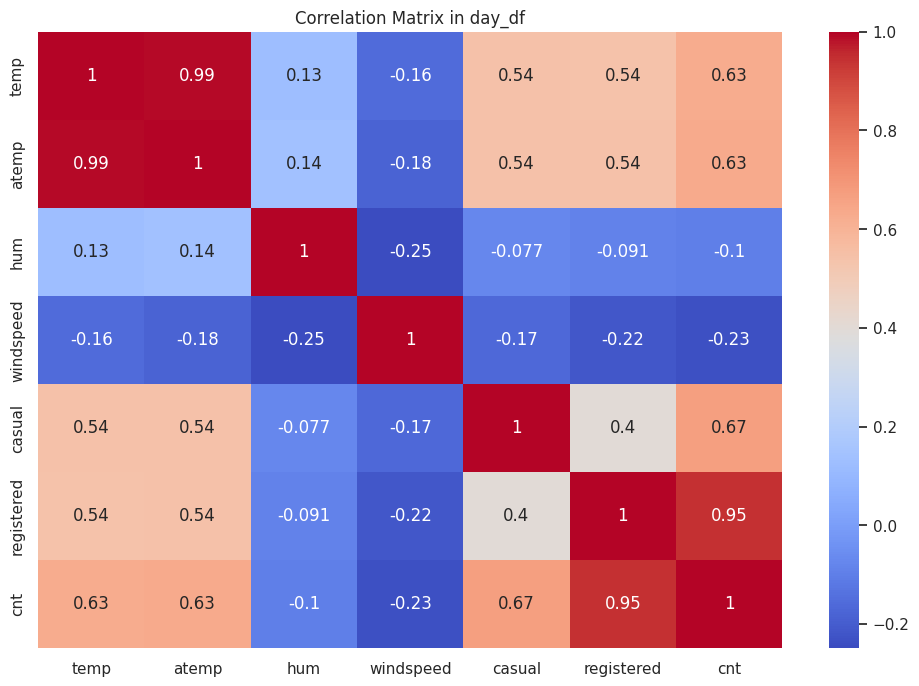

In [66]:
plt.figure(figsize=(12, 8))
sns.heatmap(day_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix in day_df')
plt.show()

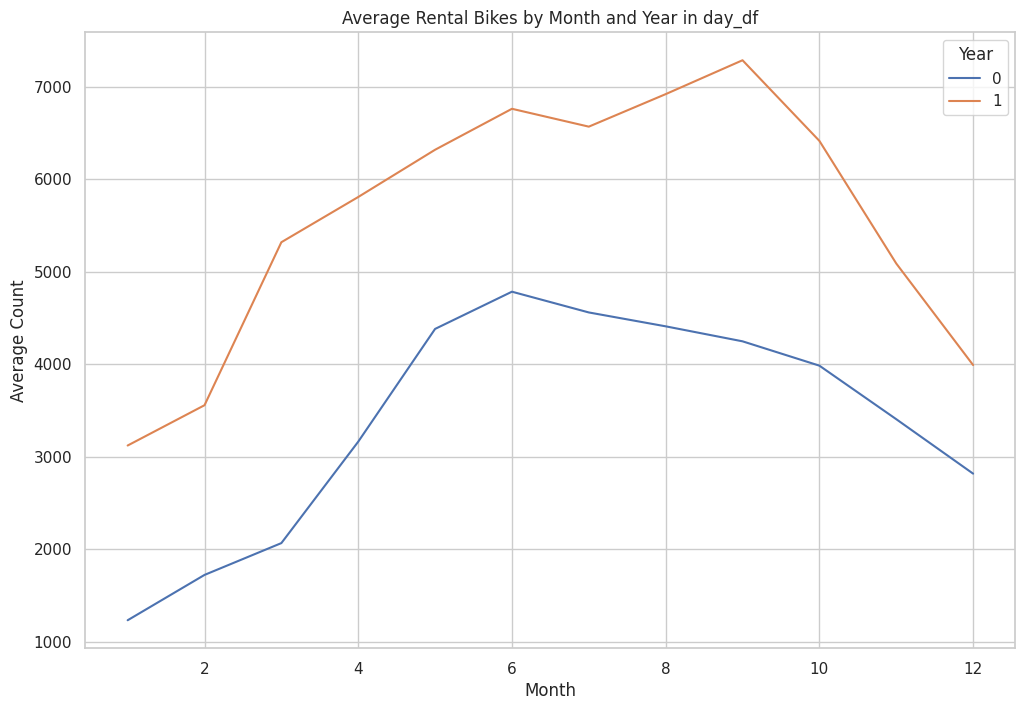

In [67]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='mnth', y='cnt', hue='yr', data=day_df.groupby(['yr', 'mnth'])['cnt'].mean().reset_index())
plt.title('Average Rental Bikes by Month and Year in day_df')
plt.xlabel('Month')
plt.ylabel('Average Count')
plt.legend(title='Year')
plt.show()

### Explore **all_df**

In [81]:
# Menampilkan tipe data kolom pada hour_df
print("Tipe data kolom pada hour_df:")
print(hour_df.dtypes)

Tipe data kolom pada hour_df:
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [82]:
# Menampilkan tipe data kolom pada day_df
print("\nTipe data kolom pada day_df:")
print(day_df.dtypes)


Tipe data kolom pada day_df:
instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [83]:
# Menggabungkan kedua dataframe berdasarkan kolom 'instant'
all_df = pd.merge(left=hour_df, right=day_df, how='left', on='instant')

In [84]:
all_df.head()

,instant,dteday_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6.0,0.0,2.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.0,0.0,2.0,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,1.0,1.0,1.0,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,2.0,1.0,1.0,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,3.0,1.0,1.0,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0


In [89]:
all_df.groupby(by=["season_x", "yr_x"]).agg({
    "cnt_x": "sum",
    "temp_x": "mean",
    "atemp_x": "mean",
    "hum_x": "mean",
    "windspeed_x": "mean",
    "casual_x": "sum",
    "registered_x": "sum",
    "cnt_y": "sum",
    "temp_y": "mean",
    "atemp_y": "mean",
    "hum_y": "mean",
    "windspeed_y": "mean",
    "casual_y": "sum",
    "registered_y": "sum"
})

cnt_x    temp_x   atemp_x     hum_x  windspeed_x  casual_x  \
season_x yr_x                                                                
1        0     150000  0.275348  0.276990  0.574623     0.215586     21425   
         1     321348  0.321785  0.318213  0.587746     0.214652     39197   
2        0     347316  0.534607  0.510330  0.658311     0.205680     77564   
         1     571273  0.554705  0.530750  0.595775     0.201144    125958   
3        0     419650  0.701339  0.654150  0.644125     0.176337     95450   
         1     641479  0.711445  0.657844  0.622287     0.166882    130641   
4        0     326137  0.426354  0.418061  0.694016     0.168109     52813   
         1     515476  0.419867  0.413375  0.639771     0.173575     76969   

               registered_x      cnt_y    temp_y   atemp_y     hum_y  \
season_x yr_x                                                          
1        0           128575  3292679.0  0.495385  0.474354  0.627894   
         1           282151        0.0       NaN       NaN       NaN   
2        0           269752        0.0       NaN       NaN       NaN   
         1           445315        0.0       NaN       NaN       NaN   
3        0           324200        0.0       NaN       NaN       NaN   
         1           510838        0.0       NaN       NaN       NaN   
4        0           273324        0.0       NaN       NaN       NaN   
         1           438507        0.0       NaN       NaN       NaN   

               windspeed_y  casual_y  registered_y  
season_x yr_x                                       
1        0        0.190486  620017.0     2672662.0  
         1             NaN       0.0           0.0  
2        0             NaN       0.0           0.0  
         1             NaN       0.0           0.0  
3        0             NaN       0.0           0.0  
         1             NaN       0.0           0.0  
4        0             NaN       0.0           0.0  
         1             NaN       0.0           0.0

In [105]:
all_df.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan peminjaman sepeda antara hari kerja dan hari libur?

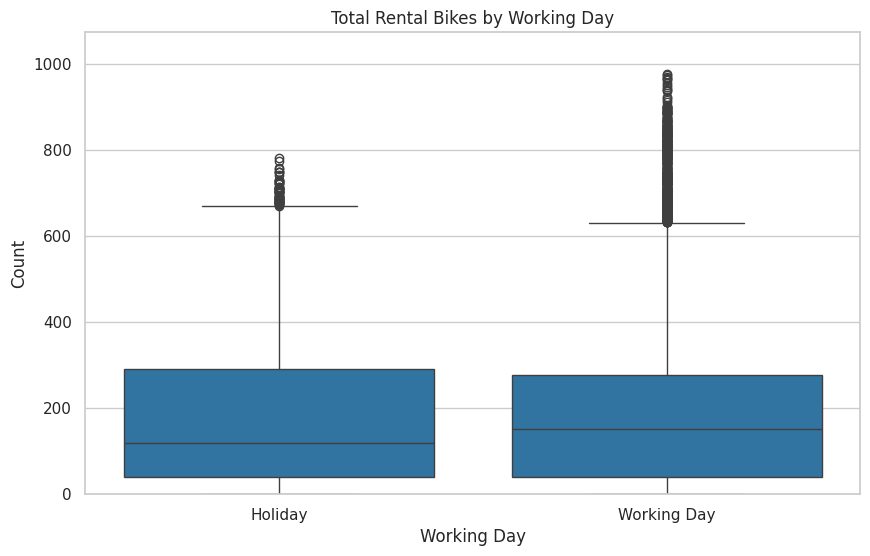

In [104]:
colors = ["#1f77b4", "#ff7f0e"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday_x', y='cnt_x', data=all_df)
plt.title('Total Rental Bikes by Working Day')
plt.xlabel('Working Day')
plt.ylabel('Count')

plt.ylim(0, all_df['cnt_x'].max() * 1.1)

plt.xticks(ticks=[0, 1], labels=['Holiday', 'Working Day'])

plt.show()

Dari grafik tersebut, kita bisa melihat bahwa:

Batang biru mewakili jumlah peminjaman sepeda pada hari libur dan hari kerja. Keduanya menunjukkan sekitar 400 peminjaman sepeda.

Di atas setiap batang, ada garis hitam (box plot) yang menunjukkan penyebaran peminjaman sepeda. Untuk “Holiday,” berkisar sekitar 200 hingga 800, dan untuk “Working Day,” berkisar sekitar 200 hingga 1000.

### Pertanyaan 2: Bagaimana tren peminjaman sepeda seiring waktu berjalan?

Kita dapat menjawab pertanyaan ini melalui visualisasi yang menunjukkan pola penggunaan sepeda berdasarkan musim dalam setahun.

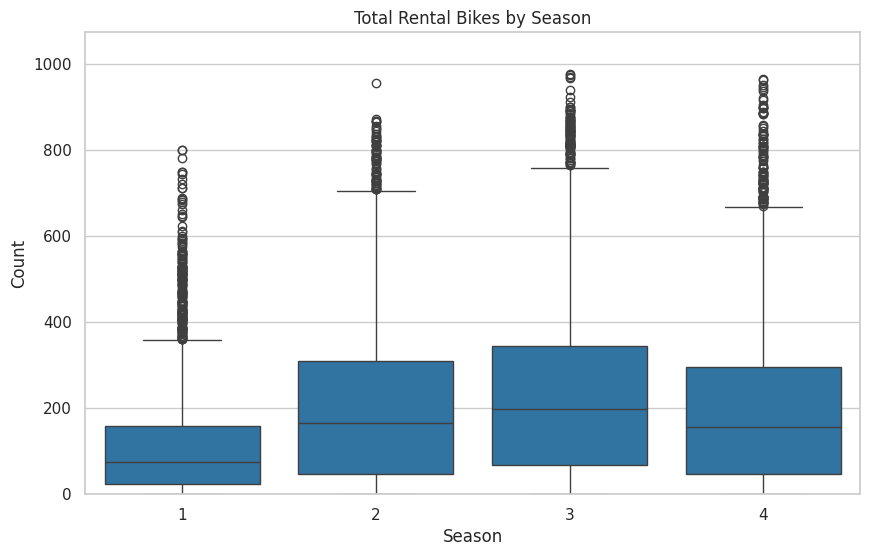

In [103]:
sns.set_style("whitegrid")

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(10, 6))
sns.boxplot(x='season_x', y='cnt_x', data=all_df)
plt.title('Total Rental Bikes by Season')
plt.xlabel('Season')
plt.ylabel('Count')

plt.ylim(0, all_df['cnt_x'].max() * 1.1)

plt.show()

Keterangan :
1. Spring (Musim Semi)
2. Summer (Musim Panas)
3. Fall (Musim Gugur)
4. Winter (Musim Dingin)

Dapat diketahui, bahwa pada musim 2 (Summer) dan musim 3 (Fall), median penyewaan sepeda lebih tinggi, yang ditunjukkan oleh garis tengah di dalam kotak.

Kotak untuk musim 2 (Summer) dan 3 (Fall) juga lebih tinggi yang menunjukkan rentang interkuartil yang lebih besar.
Dengan kata lain, pada musim 2 (Summer) dan 3 (Fall), jumlah penyewaan sepeda cenderung lebih tinggi dibandingkan musim lainnya.

Plotbox juga menunjukkan adanya outlier pada setiap musim. Outlier ini mungkin menunjukkan hari-hari tertentu di mana jumlah penyewaan sepeda sangat tinggi dibandingkan hari-hari biasanya.

## Conclusion

1. **Perbedaan Peminjaman Sepeda Antara Hari Kerja dan Hari Libur**:

> Dari boxplot pertama (“Total Rental Bikes by Workingday”), kita bisa melihat bahwa jumlah penyewaan sepeda pada hari kerja dan hari non-kerja memiliki distribusi yang serupa. Namun, terdapat lebih banyak outlier pada hari kerja, yang mungkin menunjukkan hari-hari tertentu di mana jumlah penyewaan sepeda sangat tinggi dibandingkan hari-hari biasanya. Ini mungkin menunjukkan bahwa meskipun secara umum, peminjaman sepeda tidak berbeda banyak antara hari kerja dan hari libur, ada beberapa hari kerja di mana peminjaman sepeda meningkat secara signifikan.

2. **Tren Peminjaman Sepeda Seiring Waktu Berjalan**:

> Dari boxplot kedua (“Total Rental Bikes by Season”), kita bisa melihat bahwa jumlah penyewaan sepeda cenderung lebih tinggi pada musim 2 dan 3 dibandingkan musim lainnya. Ini mungkin menunjukkan bahwa seiring berjalannya waktu (dari musim ke musim), tren peminjaman sepeda mengalami fluktuasi. Mungkin ada faktor-faktor tertentu yang mempengaruhi ini, seperti cuaca, liburan, atau acara khusus.


